<a href="https://colab.research.google.com/github/Gracepicharporn/Data-Science-project/blob/main/classification/Classification_appilance_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different method (GADF)

## UK-DALE

### Building 1

Dowload Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
path = '/content/gdrive/MyDrive/data-device/train/ON-process/2017-4-26.png'
image = Image.open(path)
image_array = np.array(image)

In [ ]:
image_array.shape

(224, 224)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image with fridge**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/train'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)
train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)
                    

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [ ]:
# shape of dataset
trainShape=train_generator.__getitem__(0)[0].shape  # train shape
testShape=test_generator.__getitem__(0)[0].shape  # test shape
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (64, 224, 224, 3)
Test Shape 
 (1, 224, 224, 3)


In [4]:
from tensorflow.keras.applications import VGG16  # VGG16 pre-trained model
import tensorflow as tf  # for deep learning
from tensorflow.keras import Model  # for creating a model
from sklearn.metrics import confusion_matrix, classification_report  # for calculating precision, recall, f1-score, and accuracy
import pandas as pd  # for creating a table
import numpy as np  # for calculating numeric values
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping  # for learning rate reduction and early stopping
lr_reduce = ReduceLROnPlateau(monitor='accuracy', patience=1)  # learning rate reduction
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)  # early stopping

def pretrained_model(model):
  '''
    Create a model from a pre-trained model by adding 1 3-nodes dense layer on top
    of the model
    Input:
      model: a pre-trained model
    Output:
      a model 
  '''
  # define a pre-trained model without the top layers, and with the default weights
  pre_trained_model = model(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
  pre_trained_model.trainable = False  # freeze the weights
  pre_trained_model.summary()

  x = tf.keras.layers.Flatten()(pre_trained_model.output)  # flatten layer
  x = tf.keras.layers.Dense(2 , activation='sigmoid')(x)  # 1 3-nodes dense layer
  model = Model(pre_trained_model.input, x) 
  model.summary()

  return model

def train(model):
  '''
    train the model
    Input:
      model: a model
    Output:
      history of the training process
  '''
  # compile the model with specific configuration
  model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
  # train the model for 10 epochs and 30 steps for each epoch
  history = model.fit(train_generator, validation_data = test_generator, epochs = 50, 
                      callbacks=[lr_reduce, early_stop])
  return history

def plot_train_evaluation(history, model):
  '''
    Plot train loss and acuracy. Then, evaluate the model (precision, recall, f1-score, and accuracy) with test dataset
    Input:
      history: a history of the training process
      model: a model
    Output:
      test report (DataFrame)
  '''
  # train loss and accuracy plot
  plt.figure(figsize=(12, 8))  # define figure size
  plt.subplot(2, 2, 1)  # create a subplot
  plt.plot(history.history['val_accuracy'], label='val_accuracy') 
  plt.plot(history.history['accuracy'], label='train_accuracy') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Accuracy plot')  # define title

  plt.subplot(2, 2, 2)  # create a subplot
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.plot(history.history['loss'], label='train_loss') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Loss plot')  # define title
  plt.show()  # show all plots

  # print out average, max, and min of train accuracy and loss
  print('average train accuracy: ', sum(history.history['accuracy'])/len(history.history['accuracy']))
  print('max train accuracy: ', max(history.history['accuracy']))
  print('average train loss: ', sum(history.history['loss'])/len(history.history['loss']))
  print('min train loss: ', min(history.history['loss']))

  print('#########################################################')
  # print out average, max, and min of validation accuracy and loss
  print('average train accuracy: ', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))
  print('max train accuracy: ', max(history.history['val_accuracy']))
  print('average train loss: ', sum(history.history['val_loss'])/len(history.history['val_loss']))
  print('min train loss: ', min(history.history['val_loss']))


In [ ]:
# VGG16 pre-trained model
model1 = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# train the model
history1 = train(model1)

Epoch 1/10
30/30 [==============================] - 460s 16s/step - loss: 0.6571 - accuracy: 0.6367 - val_loss: 0.6215 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 2/10
30/30 [==============================] - 446s 15s/step - loss: 0.4421 - accuracy: 0.8167 - val_loss: 0.4892 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 3/10
30/30 [==============================] - 459s 16s/step - loss: 0.3787 - accuracy: 0.8400 - val_loss: 0.4187 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 4/10
30/30 [==============================] - 443s 15s/step - loss: 0.3277 - accuracy: 0.8767 - val_loss: 0.3993 - val_accuracy: 0.8369 - lr: 0.0010
Epoch 5/10
30/30 [==============================] - 442s 15s/step - loss: 0.3246 - accuracy: 0.8933 - val_loss: 0.3896 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 6/10
30/30 [==============================] - 446s 15s/step - loss: 0.2506 - accuracy: 0.9233 - val_loss: 0.3704 - val_accuracy: 0.8338 - lr: 0.0010
Epoch 7/10
30/30 [==============================] - 444s 15s/step - lo

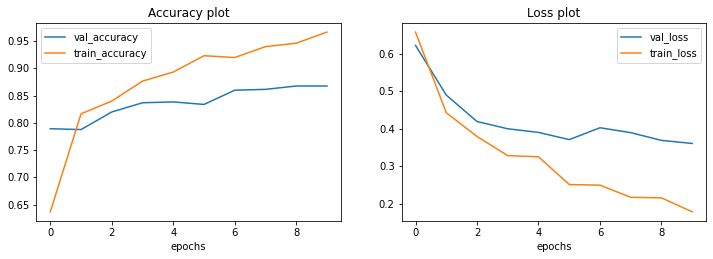

average train accuracy:  0.8759642004966736
max train accuracy:  0.9666666388511658
average train loss:  0.323913112282753
min train loss:  0.17786434292793274
#########################################################
average train accuracy:  0.8363076865673065
max train accuracy:  0.8676922917366028
average train loss:  0.42081938683986664
min train loss:  0.36015790700912476


In [ ]:
# training and testing results
plot_train_evaluation(history1, model1)

In [ ]:
model1.save("baseline.h5")

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16  
import tensorflow as tf 
from tensorflow.keras import Model  
from sklearn.metrics import confusion_matrix, classification_report  

In [ ]:
model2 = load_model('/content/gdrive/MyDrive/data-device/model/baseline.h5')

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

**Kettle**

In [ ]:
dir2 = '/content/gdrive/MyDrive/data-device/train-kettle'
train_datagen2 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator2 = train_datagen2.flow_from_directory(
     dir2,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict1 = model2.evaluate(train_generator2, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 386s 4s/step - loss: 0.6507 - accuracy: 0.7044


In [ ]:
y_predict1 

{'loss': 0.650668203830719, 'accuracy': 0.7044199109077454}

In [ ]:
model3 = load_model('/content/gdrive/MyDrive/data-device/model/baseline.h5')

**Washer Dryer**

In [ ]:
dir3 = '/content/gdrive/MyDrive/data-device/train-washer'
train_datagen3 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator3 = train_datagen3.flow_from_directory(
     dir3,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict2 = model3.evaluate(train_generator3, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 232s 2s/step - loss: 0.1488 - accuracy: 0.9583


In [ ]:
y_predict2

{'loss': 0.14884604513645172, 'accuracy': 0.9582566022872925}

### Across House






**Fridge**

In [ ]:
model4 = load_model('/content/gdrive/MyDrive/data-device/model/baseline.h5')

In [ ]:
dir4 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-fridge'
train_datagen4 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator4 = train_datagen4.flow_from_directory(
     dir4,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict4 = model4.evaluate(train_generator4, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 434s 4s/step - loss: 0.1590 - accuracy: 0.9515


In [ ]:
y_predict4

{'loss': 0.15904501080513, 'accuracy': 0.9515039920806885}

**Retain fridge**

In [5]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-fridge'
train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)
train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [6]:
model1_retain = pretrained_model(VGG16)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
history1_retain = train(model1_retain)

Epoch 1/50
41/41 [==============================] - 1577s 38s/step - loss: 0.5214 - accuracy: 0.7573 - val_loss: 0.3575 - val_accuracy: 0.8785 - lr: 0.0010
Epoch 2/50
41/41 [==============================] - 18s 437ms/step - loss: 0.2582 - accuracy: 0.9275 - val_loss: 0.2661 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 3/50
41/41 [==============================] - 18s 440ms/step - loss: 0.1922 - accuracy: 0.9513 - val_loss: 0.2515 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 4/50
41/41 [==============================] - 19s 457ms/step - loss: 0.1557 - accuracy: 0.9643 - val_loss: 0.2231 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 5/50
41/41 [==============================] - 18s 447ms/step - loss: 0.1295 - accuracy: 0.9705 - val_loss: 0.2251 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 6/50
41/41 [==============================] - 23s 551ms/step - loss: 0.1130 - accuracy: 0.9758 - val_loss: 0.2163 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 7/50
41/41 [==============================] - 19s 460ms/st

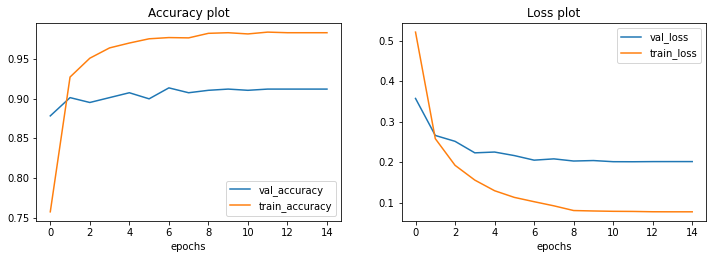

average train accuracy:  0.9589468320210774
max train accuracy:  0.9842791557312012
average train loss:  0.1409054383635521
min train loss:  0.07735218107700348
#########################################################
average train accuracy:  0.9059487144152324
max train accuracy:  0.9138461351394653
average train loss:  0.224423411488533
min train loss:  0.20106571912765503


In [8]:
plot_train_evaluation(history1_retain, model1_retain)

In [9]:
model1_retain.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/acrosshouse-fridge.h5")

**Kettle**

In [ ]:
dir5 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-kettle'
train_datagen5 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator5 = train_datagen5.flow_from_directory(
     dir5,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict5 = model4.evaluate(train_generator5, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 298s 3s/step - loss: 2.0807 - accuracy: 0.3149


In [ ]:
y_predict5

{'loss': 2.0807077884674072, 'accuracy': 0.31491711735725403}

**Washer Dryer**

In [ ]:
dir6 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/acrosshouse/train-washer'
train_datagen6 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator6 = train_datagen6.flow_from_directory(
     dir6,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict6 = model4.evaluate(train_generator6, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 434s 4s/step - loss: 0.1479 - accuracy: 0.9586


In [ ]:
y_predict6

{'loss': 0.14791391789913177, 'accuracy': 0.958563506603241}

## REDD

### Building1

**fridge**

In [ ]:
dir7 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-fridge'
train_datagen7 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator7 = train_datagen7.flow_from_directory(
     dir7,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict7 = model4.evaluate(train_generator7, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 10s 5s/step - loss: 1.0809 - accuracy: 0.4861


In [ ]:
y_predict7

{'loss': 1.0808768272399902, 'accuracy': 0.4861111044883728}

**microwave**

In [ ]:
dir8 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-microwave'
train_datagen8 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator8 = train_datagen8.flow_from_directory(
     dir8,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict8 = model4.evaluate(train_generator8, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 4s/step - loss: 1.0985 - accuracy: 0.4861


In [ ]:
y_predict8

{'loss': 1.0984779596328735, 'accuracy': 0.4861111044883728}

**Washer Dryer**

In [ ]:
dir9 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/building1/train-washer'
train_datagen9 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator9 = train_datagen9.flow_from_directory(
     dir9,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
y_predict9 = model4.evaluate(train_generator9, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 1s 132ms/step - loss: 1.0906 - accuracy: 0.4861


In [ ]:
y_predict9

{'loss': 1.0905508995056152, 'accuracy': 0.4861111044883728}

###Across House

**fridge**

In [ ]:
dir10 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-fridge'
train_datagen10 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator10 = train_datagen10.flow_from_directory(
     dir10,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict10 = model4.evaluate(train_generator10, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 3s/step - loss: 0.8116 - accuracy: 0.5833


**Microwave**

In [ ]:
dir11 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-microwave'
train_datagen11 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator11 = train_datagen11.flow_from_directory(
     dir11,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [ ]:
y_predict11 = model4.evaluate(train_generator11, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 8s 4s/step - loss: 1.0315 - accuracy: 0.5139


In [ ]:
y_predict11 

{'loss': 1.0315206050872803, 'accuracy': 0.5138888955116272}

**Washer Dryer**

In [ ]:
dir12 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg/train-washer'
train_datagen12 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator12 = train_datagen12.flow_from_directory(
     dir12,  # train folder
     shuffle = True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [ ]:
y_predict12 = model4.evaluate(train_generator12, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 7s 3s/step - loss: 1.0585 - accuracy: 0.4861


In [ ]:
y_predict12

{'loss': 1.0585179328918457, 'accuracy': 0.4861111044883728}